In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K 

Using TensorFlow backend.


In [0]:
train_df= pd.read_pickle('/content/drive/My Drive/traffic_sign_classification/train.p')

In [0]:
test_df = pd.read_pickle('/content/drive/My Drive/traffic_sign_classification/test.p')

In [0]:
val_df = pd.read_pickle('/content/drive/My Drive/traffic_sign_classification/valid.p')

In [7]:
X_train.shape

(34799, 32, 32, 3)

In [0]:
X_train, y_train = train_df['features'], train_df['labels']
X_test, y_test = test_df['features'], test_df['labels']
X_val, y_val = val_df['features'], val_df['labels']


In [8]:
print(X_train[34798][31][31])

[57 68 80]


In [0]:
import random

def list_images(dataset, dataset_y, ylabel="", cmap=None):
    
    plt.figure(figsize=(15, 16))
    for i in range(6):
        plt.subplot(1, 6, i+1)
        indx = random.randint(0, len(dataset))
        cmap = 'gray' if len(dataset[indx].shape) == 2 else cmap
        plt.imshow(dataset[indx], cmap = cmap)
        plt.ylabel(ylabel)
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.show()

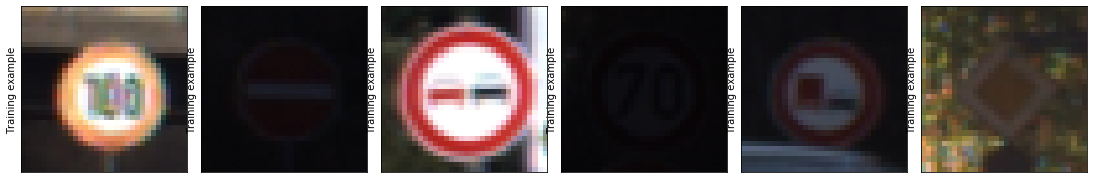

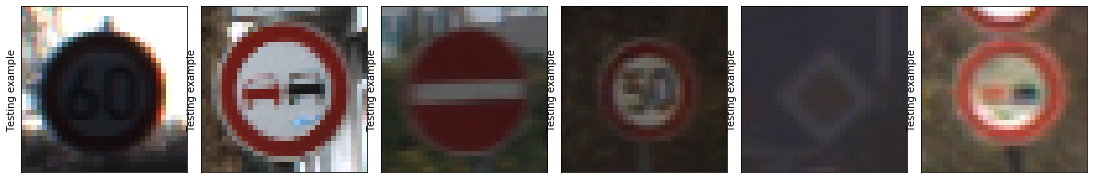

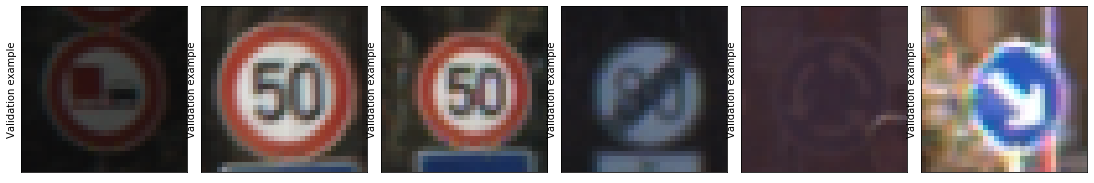

In [10]:
# Plotting sample examples
list_images(X_train, y_train, "Training example")
list_images(X_test, y_test, "Testing example")
list_images(X_val, y_val, "Validation example")

In [0]:
#from skimage.color import rgb2gray

#grayscale = rgb2gray(X_train[3])
import cv2
def convert_to_grayscale(image):
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  return gray

In [0]:
grayscale_train = list(map(convert_to_grayscale,X_train))


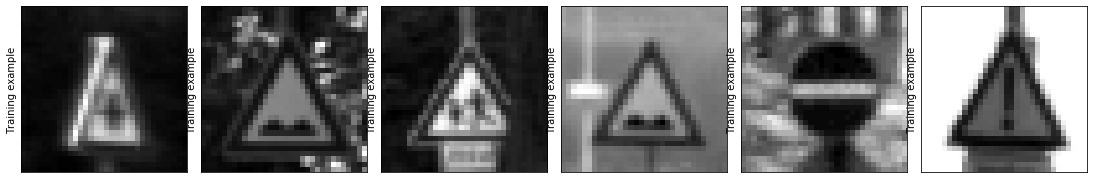

In [13]:
list_images(grayscale_train, y_train, "Training example")


In [0]:
import cv2
def blur_image(image):

  blur = cv2.GaussianBlur(image,(3,3),0)
  return blur

In [0]:

blur_train = list(map(blur_image,grayscale_train))


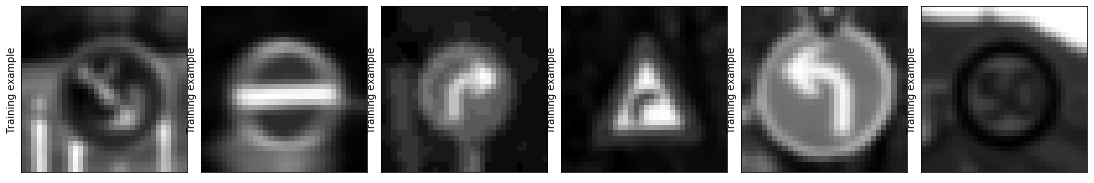

In [16]:
list_images(blur_train, y_train, "Training example")


In [0]:
img = grayscale_train[2]
edges = cv2.Canny(img,100,200)



In [0]:
gray = cv2.cvtColor(X_train[2], cv2.COLOR_BGR2GRAY)
blurr = blur_image(gray)
edges = cv2.Canny(blurr,30,40)






In [19]:
len(lines)

NameError: ignored

In [0]:
plt.imshow(linesP)

In [0]:
def canny_edge_detection(image):
  edges = cv2.Canny(image,40,50)
  return edges

In [0]:

edge_detection_train = list(map(canny_edge_detection, blur_train))

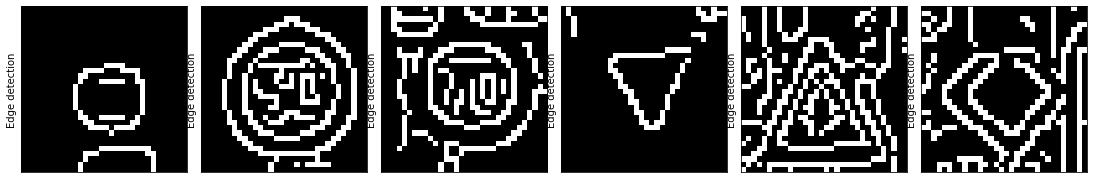

In [22]:
list_images(edge_detection_train, y_train, "Edge detection")

In [0]:
#linesP = cv2.HoughLinesP(edges, 1, np.pi / 180, 200, None, 0, 0)
# Draw the lines
#if linesP is not None:
#  for i in range(0, len(linesP)):
#    l = linesP[i][0]
#    cv2.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)

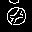

In [54]:
import cv2
from google.colab.patches import cv2_imshow

rows = edges.shape[0]
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1, rows / 64, param1=50, param2=40, minRadius=0, maxRadius=0)
    
if circles is not None:
  circles = np.uint16(np.around(circles))
  print("Not NONE")
  for i in circles[0, :]:
    center = (i[0], i[1])
    # circle center
    cv2.circle(edges, center, 1, (0, 100, 100), 3)
    # circle outline
    radius = i[2]
    cv2.circle(edges, center, radius, (255, 0, 255), 3)
cv2_imshow(edges)


In [56]:
print(rows)

32


In [55]:
print(circles)

None


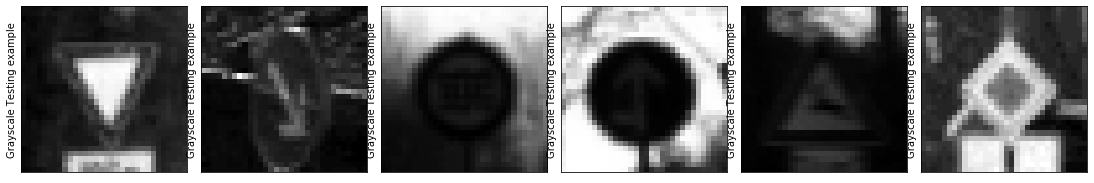

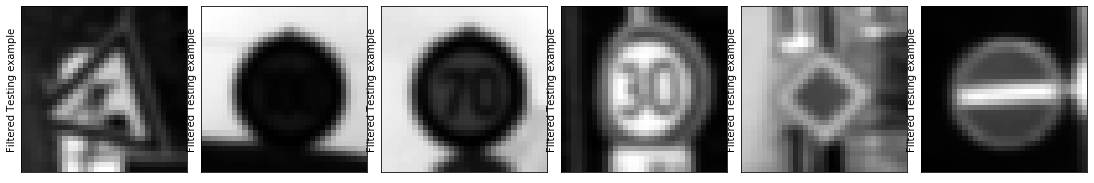

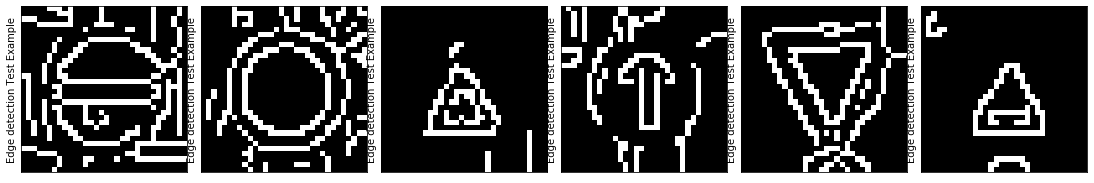

In [149]:
grayscale_test = list(map(convert_to_grayscale,X_test))
list_images(grayscale_test, y_test, "Grayscale Testing example")

blur_test = list(map(blur_image,grayscale_test))
list_images(blur_test, y_test, "Filtered Testing example")

edge_detection_test = list(map(canny_edge_detection, blur_test))
list_images(edge_detection_test, y_test, "Edge detection Test Example")

In [0]:
flatten_test = edge_detection_test.reshape((n_samples_test, -1))

In [0]:
edge_detection_test = list(map(canny_edge_detection, X_test))

In [78]:
len(X_train)

34799

In [0]:
edge_detection_train = np.asarray(edge_detection_train, dtype=np.float32)


In [0]:
edge_detection_test = np.asarray(edge_detection_test, dtype=np.float32)


In [0]:
#from here we will be using the images. First we should flatten the images
n_samples_train = len(X_train)
n_samples_test = len(X_test)
#edge_detection_train = np.asarray(edge_detection_train, dtype=np.float32)

flatten_train = edge_detection_train.reshape((n_samples_train, -1))
flatten_test = edge_detection_test.reshape((n_samples_test, -1))

In [146]:
flatten_train.shape

(34799, 1024)

In [0]:
img_index = 0
for img_index in range(10,20):
  plt.imshow(X_train[img_index,:,:,:])
  plt.show()
  print(y_train[img_index])

In [147]:
X_train.shape[3]

3

In [148]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(flatten_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
y_pred1 = svclassifier.predict(flatten_test)

In [154]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.6466349960411718


In [0]:
import pickle
filename = 'SVM_model_64.sav'
pickle.dump(svclassifier, open(filename, 'wb'))

Downside- KNN not meant for large datasets, took lot of time for predicting output

# Accuracy of SVM classifier: 64.66%

# References:
- https://blog.hyperiondev.com/index.php/2019/02/18/machine-learning/
- https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn
- https://github.com/mohamedameen93/German-Traffic-Sign-Classification-Using-TensorFlow/blob/master/Traffic_Sign_Classifier.ipynb